## ***Ames Housing Price Prediction: Linear Regression Approach***

## Project Summary

🔹 **Objective**:

The goal of this project was to predict house prices in Ames, Iowa, using linear regression models while learning and applying different regression techniques.

🔹**Steps Taken**:

✅ Data Cleaning & Preprocessing: Handled missing values, encoded categorical variables, and scaled numerical features.

✅ Feature Engineering: Selected relevant features using VIF analysis to reduce multicollinearity.

✅ Baseline Model: Built a simple linear regression model to establish initial performance.

✅ Regularization Models: Compared Ridge, Lasso, and Elastic Net to improve generalization.

✅ Final Model Selection: Ridge Regression (α = 100) is opted.

✅ Model Evaluation: Used R² and RMSE on train & test data, plotted residuals, and checked feature importance.

🔹 **Model & Performance**:

📌 Final Model: Ridge Regression (α = 100)

📌 Test R²: 0.9236 (indicating a strong fit)

📌 Top Feature: MS Zoning_RL (Coefficient: 0.014049)

🔹 **Key Takeaways**:

✔️ Linear models work well for this dataset but may not capture all complex relationships.

✔️ Feature selection was crucial in improving model stability.

✔️ Regularization helped reduce overfitting and improved test performance.

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Yocan write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


## Data Inspection

In [2]:
data = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv',
                  index_col=['Order'])
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.shape

(2930, 81)

In [4]:
data.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 38
Categorical columns: 43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual     29

In [7]:
data.select_dtypes(include='object').nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type         10
Sale Condition     6
dtype: int64

In [8]:
data.select_dtypes(include='object').nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type         10
Sale Condition     6
dtype: int64

In [9]:
correlation = data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).round(2)
top_10 = correlation.head(10)
bottom_10 = correlation.tail(10)
print(top_10)
print(bottom_10)

SalePrice         1.00
Overall Qual      0.80
Gr Liv Area       0.71
Garage Cars       0.65
Garage Area       0.64
Total Bsmt SF     0.63
1st Flr SF        0.62
Year Built        0.56
Full Bath         0.55
Year Remod/Add    0.53
Name: SalePrice, dtype: float64
BsmtFin SF 2       0.01
Misc Val          -0.02
Yr Sold           -0.03
Bsmt Half Bath    -0.04
Low Qual Fin SF   -0.04
MS SubClass       -0.09
Overall Cond      -0.10
Kitchen AbvGr     -0.12
Enclosed Porch    -0.13
PID               -0.25
Name: SalePrice, dtype: float64


In [10]:
data[data.duplicated()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,


## EDA and Visualization

In [11]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

### Univariate and Bivariate Analysis

In [13]:
# For numerical features
important_numerical = correlation.index[1:5]
important_numerical

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area'], dtype='object')

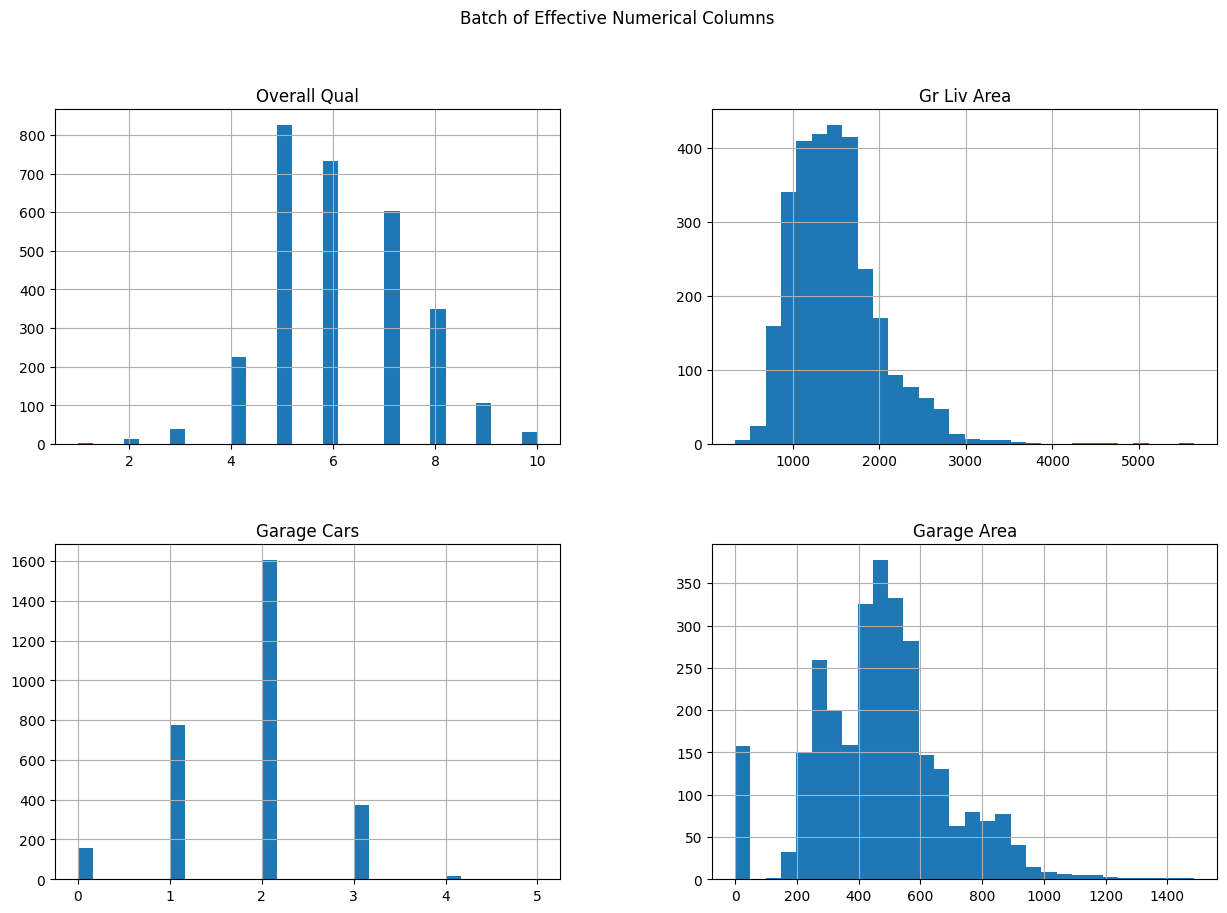

In [14]:
num_batches = int(np.ceil(len(important_numerical) / 5))  # Split into batches of 5
for i in range(num_batches):
    batch_cols = important_numerical[i*5:(i+1)*5]
    data[batch_cols].hist(figsize=(15, 10), bins=30)
    plt.suptitle("Batch of Effective Numerical Columns")
    plt.show()

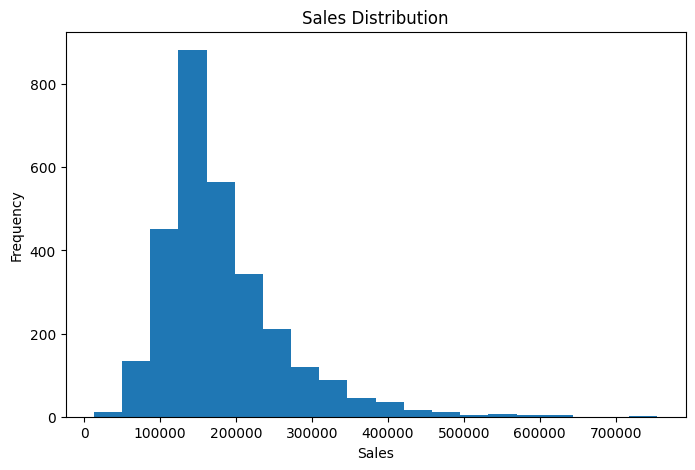

In [15]:
plt.subplots(figsize=(8, 5))

plt.hist(data['SalePrice'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [16]:
important_categorical = [col for col in categorical_cols if data[col].nunique() < 10]

In [17]:
# For categorical columns
categorical_summary = {}
for col in data.select_dtypes(include='object').columns:
    unique_values = data[col].nunique()
    top_categories = data[col].value_counts(normalize=True).head(3)
    categorical_summary[col] = {
        'Unique Values': unique_values,
        'Most Common': top_categories.index.tolist(),
        'Frequency (%)': (top_categories.values * 100).round(2).tolist()
    }

import pandas as pd
categorical_summary_df = pd.DataFrame.from_dict(categorical_summary, orient='index')
print(categorical_summary_df)

                Unique Values                  Most Common  \
MS Zoning                   7                 [RL, RM, FV]   
Street                      2                 [Pave, Grvl]   
Alley                       2                 [Grvl, Pave]   
Lot Shape                   4              [Reg, IR1, IR2]   
Land Contour                4              [Lvl, HLS, Bnk]   
Utilities                   3     [AllPub, NoSewr, NoSeWa]   
Lot Config                  5    [Inside, Corner, CulDSac]   
Land Slope                  3              [Gtl, Mod, Sev]   
Neighborhood               28    [NAmes, CollgCr, OldTown]   
Condition 1                 9        [Norm, Feedr, Artery]   
Condition 2                 8        [Norm, Feedr, Artery]   
Bldg Type                   5       [1Fam, TwnhsE, Duplex]   
House Style                 8     [1Story, 2Story, 1.5Fin]   
Roof Style                  6        [Gable, Hip, Gambrel]   
Roof Matl                   8  [CompShg, Tar&Grv, WdShake]   
Exterior

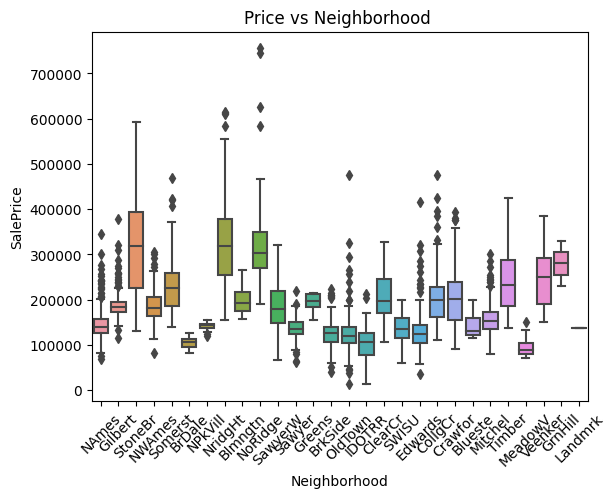

In [18]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Price vs Neighborhood ')
plt.xticks(rotation=45)
plt.show()

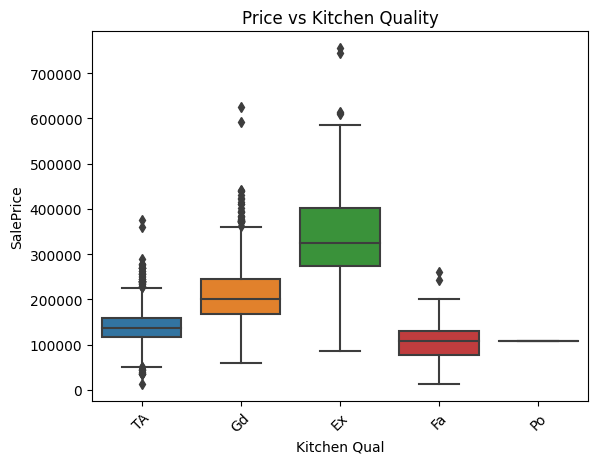

In [19]:
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=data)
plt.title('Price vs Kitchen Quality')
plt.xticks(rotation=45)
plt.show()

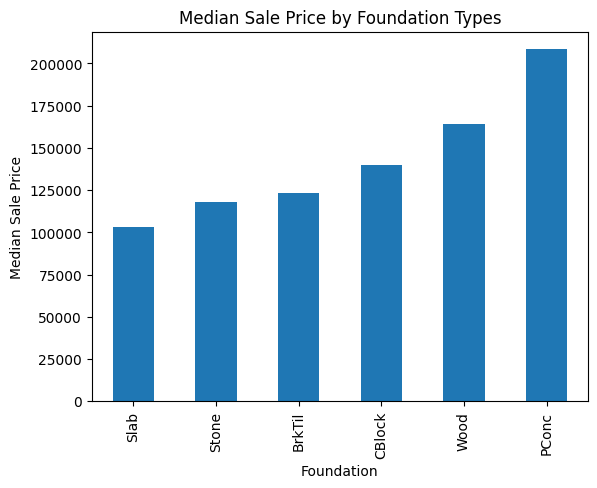

In [20]:
data.groupby('Foundation')['SalePrice'].median().sort_values().plot(kind='bar', title='Median Sale Price by Foundation Types')
plt.ylabel('Median Sale Price');

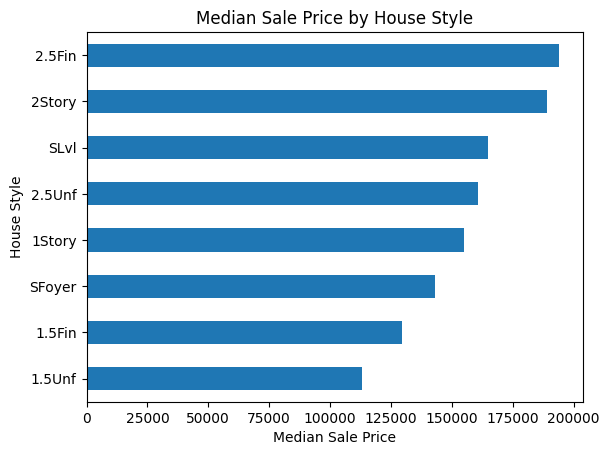

In [21]:
data.groupby('House Style')['SalePrice'].median().sort_values().plot(
    kind='barh', title='Median Sale Price by House Style'
)
plt.xlabel('Median Sale Price');

<Axes: xlabel='Sale Type', ylabel='count'>

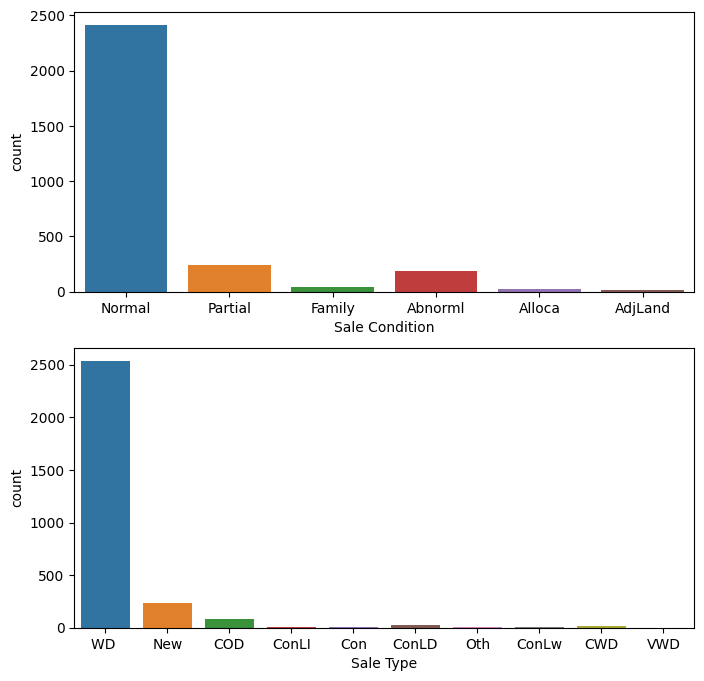

In [22]:
fig, axs = plt.subplots(2, figsize=(8, 8))

sns.countplot(data, x='Sale Condition', ax=axs[0])
sns.countplot(data, x='Sale Type', ax=axs[1])

### Multivariate Analysis

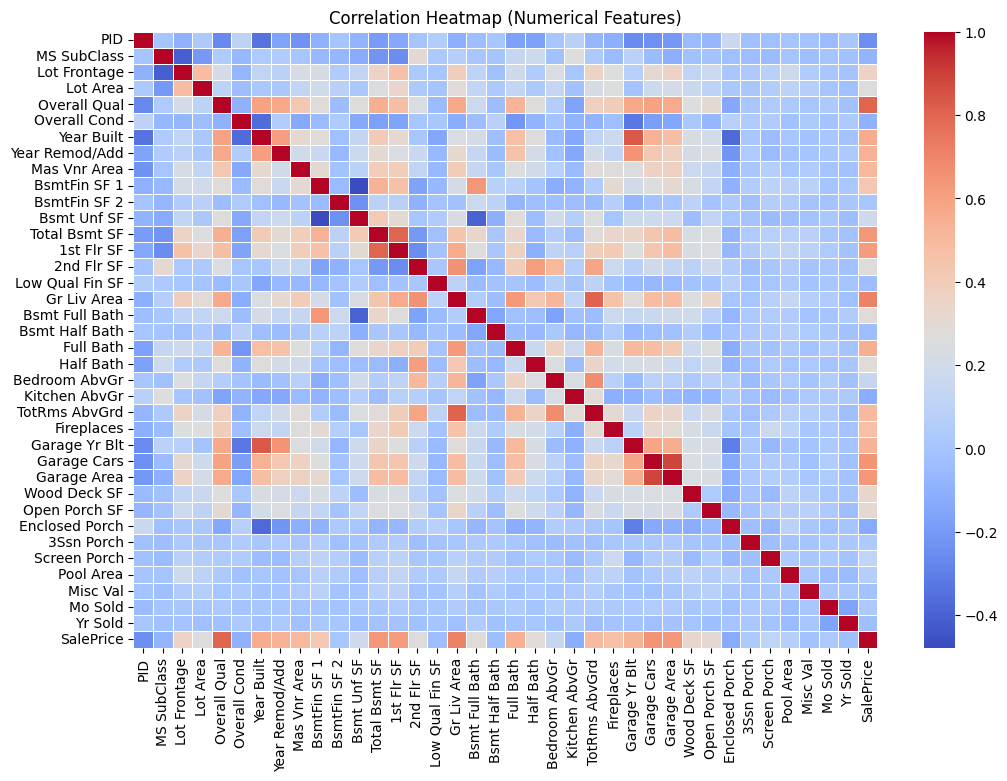

In [23]:
df_num = data.select_dtypes(include=[np.number])
corr_matrix = df_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

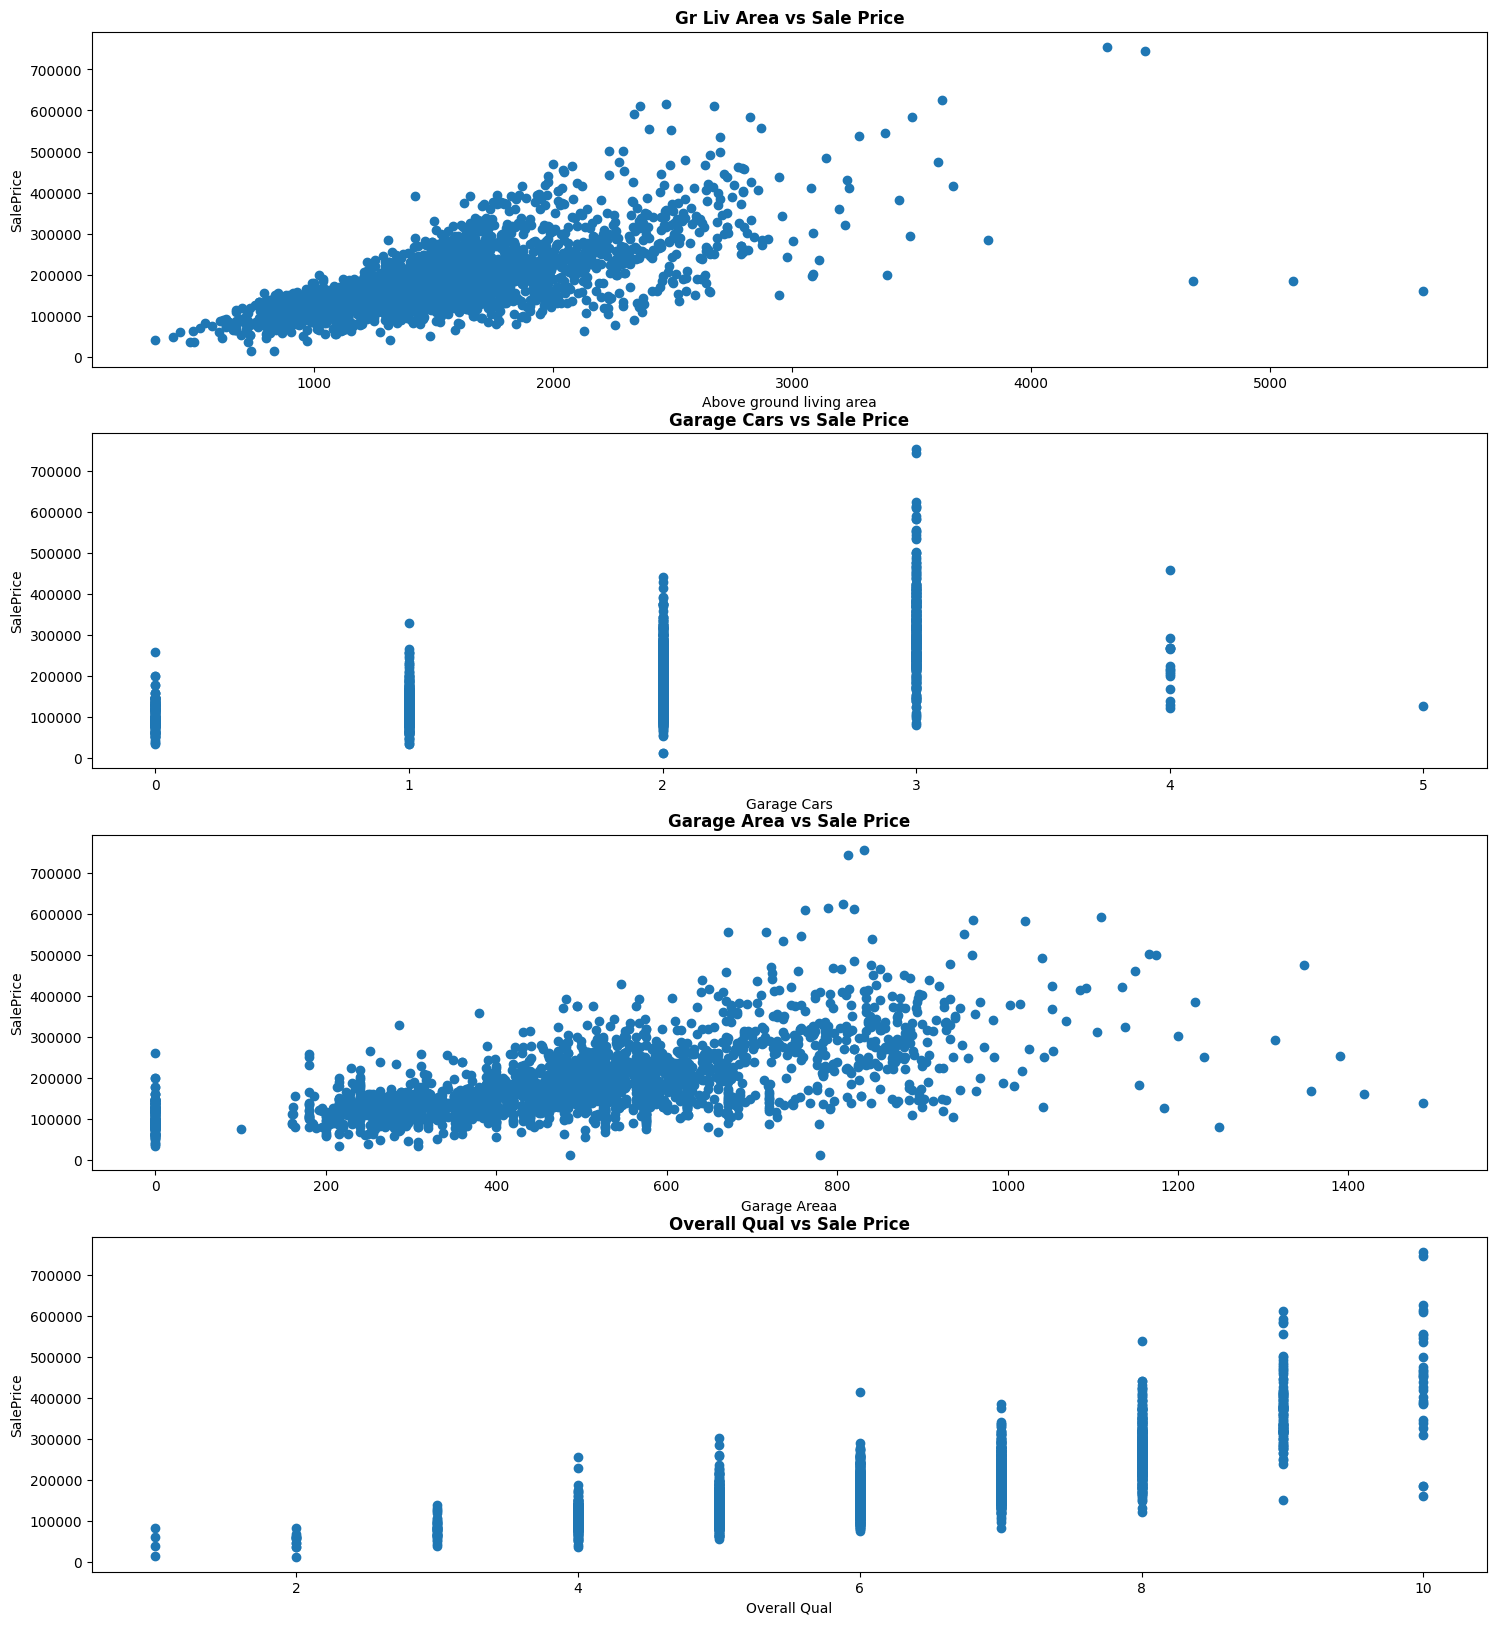

In [24]:
fig, axes = plt.subplots(4, figsize=(18,20))

axes[0].scatter(data['Gr Liv Area'], data['SalePrice'])
axes[0].set_xlabel('Above ground living area')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('Gr Liv Area vs Sale Price', fontweight='bold')

axes[1].scatter(data['Garage Cars'], data['SalePrice'])
axes[1].set_xlabel('Garage Cars')
axes[1].set_ylabel('SalePrice')
axes[1].set_title('Garage Cars vs Sale Price', fontweight='bold')

axes[2].scatter(data['Garage Area'], data['SalePrice'])
axes[2].set_xlabel('Garage Areaa')
axes[2].set_ylabel('SalePrice')
axes[2].set_title('Garage Area vs Sale Price', fontweight='bold')

axes[3].scatter(data['Overall Qual'], data['SalePrice'])
axes[3].set_xlabel('Overall Qual')
axes[3].set_ylabel('SalePrice')
axes[3].set_title('Overall Qual vs Sale Price', fontweight='bold')

plt.show()

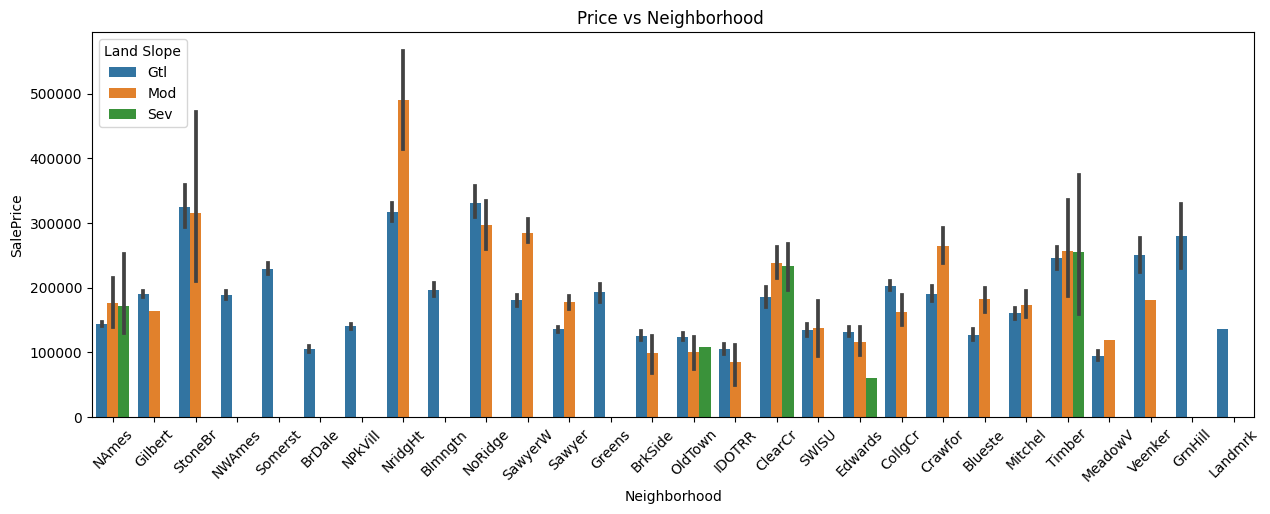

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='Neighborhood', y='SalePrice', data=data, hue='Land Slope')
plt.title('Price vs Neighborhood ')
plt.xticks(rotation=45)
plt.show()

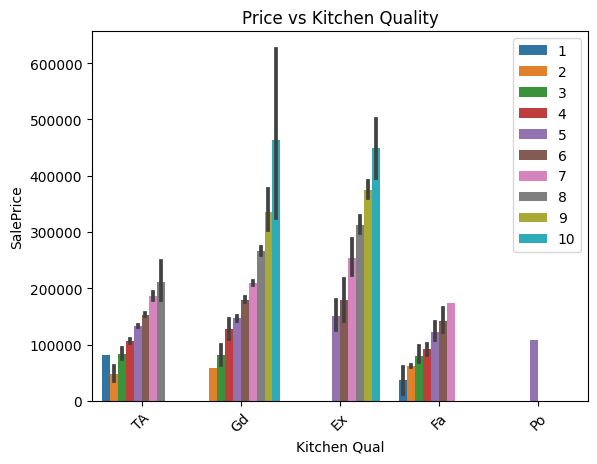

In [26]:
sns.barplot(x='Kitchen Qual', y='SalePrice', data=data, hue='Overall Qual')
plt.title('Price vs Kitchen Quality')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

## Feature Engineering

### Handling Missing Values

In [27]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = (missing_values/len(data))*100

pd.DataFrame(
    {'Missing Values': missing_values, 'Missing Percentage': missing_percentage}
)

,Missing Values,Missing Percentage
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas Vnr Type,1775,60.580205
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Cond,159,5.426621
Garage Qual,159,5.426621
Garage Finish,159,5.426621


In [28]:
#Dropping non-relevant columns with high %age of null values
data.drop(columns=['PID', 'Pool QC', 'Misc Feature', 'Alley'], inplace=True)

In [29]:
#Filling categorical missing values with NONE
fill_none_cols = ['Fence', 'Fireplace Qu', 'Mas Vnr Type', 'Garage Type', 
                  'Garage Finish', 'Garage Qual', 'Garage Cond', 
                  'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

data[fill_none_cols] = data[fill_none_cols].fillna("None")

In [30]:
# Fill missing values with 0 for features where missing means "no such feature"
fill_zero_cols = ['Mas Vnr Area', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 
                  'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                  'Bsmt Full Bath', 'Bsmt Half Bath']

data[fill_zero_cols] = data[fill_zero_cols].fillna(0)

In [31]:
# Fill Lot Frontage with median grouped by Neighborhood
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.dropna().median()))
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())

In [32]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [33]:
data.isna().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

### Outliers Detection

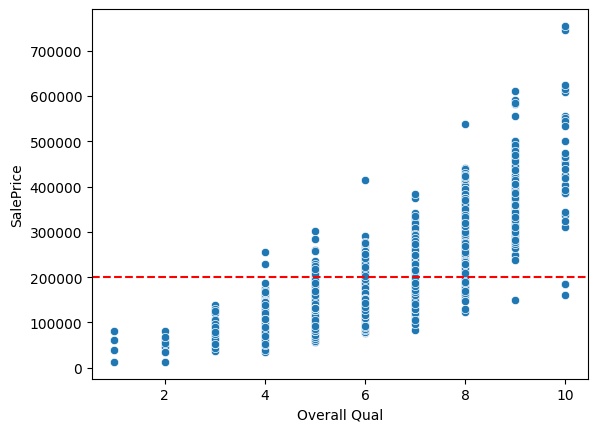

In [34]:
sns.scatterplot(data=data, x='Overall Qual', y='SalePrice')
plt.axhline(y=200000,color='r',linestyle='--')

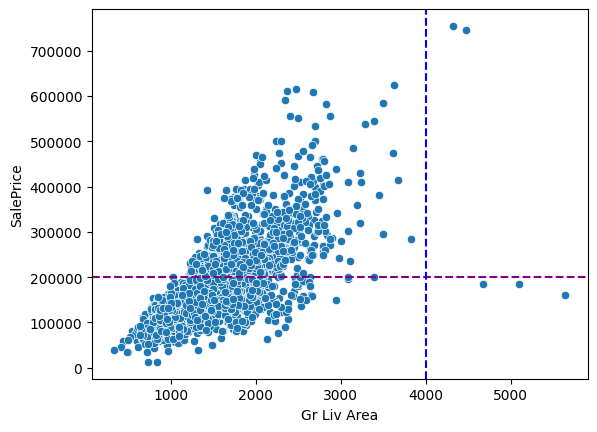

In [35]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)
plt.axhline(y=200000, color='purple', linestyle='--')
plt.axvline(x=4000, color='b', linestyle='--')

In [36]:
copy_data = data

In [37]:
drop_index = data[(data['Gr Liv Area'] > 4000) & (data['SalePrice'] < 200000)].index

In [38]:
data[(data['Gr Liv Area']>4000) & (data['SalePrice']<400000)][['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
Order,,
1499,160000,5642
2181,183850,5095
2182,184750,4676


In [39]:
data = data.drop(drop_index, axis=0)

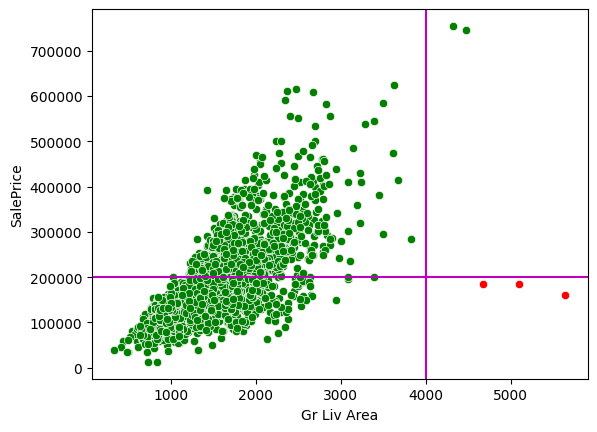

In [40]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=copy_data, color='red')

sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data, color='green')
plt.axhline(y=200000, color='m')
plt.axvline(x=4000, color='m')

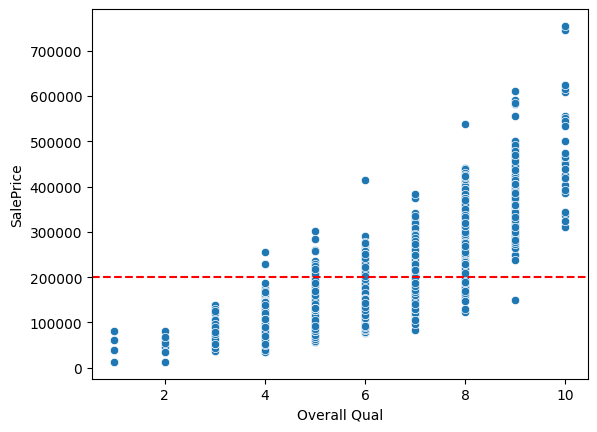

In [41]:
sns.scatterplot(data=data, x='Overall Qual', y='SalePrice')
plt.axhline(y=200000,color='r',linestyle='--')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 2930
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2927 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Lot Shape        2927 non-null   object 
 6   Land Contour     2927 non-null   object 
 7   Utilities        2927 non-null   object 
 8   Lot Config       2927 non-null   object 
 9   Land Slope       2927 non-null   object 
 10  Neighborhood     2927 non-null   object 
 11  Condition 1      2927 non-null   object 
 12  Condition 2      2927 non-null   object 
 13  Bldg Type        2927 non-null   object 
 14  House Style      2927 non-null   object 
 15  Overall Qual     2927 non-null   int64  
 16  Overall Cond     2927 non-null   int64  
 17  Year Built       29

### Creating New features

In [43]:
df=data

In [44]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [45]:
df["House Age"] = df["Yr Sold"] - df["Year Built"]
df["Remodel Age"] = df["Yr Sold"] - df["Year Remod/Add"]
df["Total Bathrooms"] = (df["Full Bath"] + df["Half Bath"] * 0.5 +
                         df["Bsmt Full Bath"] + df["Bsmt Half Bath"] * 0.5)
df["Total SF"] = df["Total Bsmt SF"] + df["1st Flr SF"] + df["2nd Flr SF"]
df["Total Porch SF"] = (df["Open Porch SF"] + df["Enclosed Porch"] + 
                       df["3Ssn Porch"] + df["Screen Porch"])
df["Lot Frontage Ratio"] = df["Lot Frontage"] / df["Lot Area"]

df[["House Age", "Remodel Age", "Total Bathrooms", "Total SF", "Total Porch SF", "Lot Frontage Ratio"]].head()


,House Age,Remodel Age,Total Bathrooms,Total SF,Total Porch SF,Lot Frontage Ratio
Order,,,,,,
1,50,50,2.0,2736.0,62,0.004438
2,49,49,1.0,1778.0,120,0.006883
3,52,52,1.5,2658.0,36,0.005677
4,42,42,3.5,4220.0,0,0.008333
5,13,12,2.5,2557.0,34,0.005351


In [46]:
df.drop(["Year Built", "Year Remod/Add", "Full Bath", "Half Bath", 
         "Bsmt Full Bath", "Bsmt Half Bath", "1st Flr SF", "2nd Flr SF", 
         "Total Bsmt SF", "Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch"], axis=1, inplace=True)


### Checking skewness

In [47]:
numeric_feats = df.select_dtypes(include=[np.number])  
skewness = numeric_feats.skew().sort_values(ascending=False)

skewed_features = skewness[abs(skewness) > 0.5].index  
print(skewness[abs(skewness) > 0.5])

Misc Val              22.232593
Pool Area             17.728333
Lot Area              13.185490
Low Qual Fin SF       12.111843
Kitchen AbvGr          4.311274
BsmtFin SF 2           4.138347
Lot Frontage Ratio     3.153532
Mas Vnr Area           2.600195
Total Porch SF         2.252346
Wood Deck SF           1.844800
SalePrice              1.742501
MS SubClass            1.356882
Lot Frontage           1.099112
Gr Liv Area            0.976593
Bsmt Unf SF            0.924561
BsmtFin SF 1           0.830800
Total SF               0.734449
Fireplaces             0.731574
TotRms AbvGrd          0.704940
House Age              0.602487
Overall Cond           0.572937
Garage Yr Blt         -3.914590
dtype: float64


In [48]:
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

print(df[skewed_features].skew())

Misc Val               5.235091
Pool Area             15.658385
Lot Area              -0.533760
Low Qual Fin SF        8.574279
Kitchen AbvGr          3.528023
BsmtFin SF 2           2.448498
Lot Frontage Ratio     3.072100
Mas Vnr Area           0.543860
Total Porch SF        -0.573697
Wood Deck SF           0.156235
SalePrice             -0.014353
MS SubClass            0.238339
Lot Frontage          -1.063610
Gr Liv Area           -0.036137
Bsmt Unf SF           -2.143920
BsmtFin SF 1          -0.621063
Total SF              -0.462628
Fireplaces             0.235384
TotRms AbvGrd          0.008484
House Age             -0.819679
Overall Cond          -0.745350
Garage Yr Blt         -3.934378
dtype: float64


### Encoding Categorical Features

In [49]:
cat_features = df.select_dtypes(include=["object"]).columns  
print(cat_features)

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'Sale Type', 'Sale Condition'],
      dtype='object')


In [50]:
#For Ordinal Features
ordinal_features = ["Lot Shape", "Land Slope", "Exter Qual", "Exter Cond", "Bsmt Qual",
                    "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2",
                    "Heating QC", "Kitchen Qual", "Fireplace Qu", "Garage Finish",
                    "Garage Qual", "Garage Cond", "Paved Drive", "Fence"]

label_encoder = LabelEncoder()
for feature in ordinal_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [51]:
#For Nominal Features
nominal_features = ["MS Zoning", "Street", "Land Contour", "Utilities", "Lot Config", 
                    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", 
                    "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                    "Central Air", "Electrical", "Functional", "Garage Type", 
                    "Sale Type", "Sale Condition"]

df = pd.get_dummies(df, columns=nominal_features, dtype='int', drop_first=True)

In [52]:
df.head()

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
Order,,,,,,,,,,,,,,,,,,,,,
1,3.044522,4.955827,10.366309,0,0,6,1.791759,4.727388,3,4,...,0,0,0,0,1,0,0,0,1,0
2,3.044522,4.394449,9.360741,3,0,5,1.945910,0.000000,3,4,...,0,0,0,0,1,0,0,0,1,0
3,3.044522,4.406719,9.565775,0,0,6,1.945910,4.691348,3,4,...,0,0,0,0,1,0,0,0,1,0
4,3.044522,4.543295,9.320181,3,0,7,1.791759,0.000000,2,4,...,0,0,0,0,1,0,0,0,1,0
5,4.110874,4.317488,9.534668,0,0,5,1.791759,0.000000,3,4,...,0,0,0,0,1,0,0,0,1,0


## Model Building

### Features Matrix and Target Vector

In [53]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

### Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Dropping High VIF features

In [55]:
X_train = X_train.drop(columns=["Exterior 1st_PreCast", "Exterior 2nd_PreCast"])
X_test = X_test.drop(columns=["Exterior 1st_PreCast", "Exterior 2nd_PreCast"])

In [56]:
high_vif_features = ["Garage Yr Blt", "Garage Type_None", "Yr Sold", "Total SF", "Gr Liv Area"]
X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)

### Feature Scaling

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Log Transformation

In [58]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

### Linear Regression

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Predictions

In [60]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [61]:
print(f"Train R²: {train_r2:.4f}, Train RMSE: {train_rmse:.2f}")
print(f"Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.2f}")

Train R²: 0.9100, Train RMSE: 0.01
Test R²: -1274566941494572482560.0000, Test RMSE: 1156702733.81


### VIFs

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [63]:
vif[vif["VIF"] > 10].sort_values(by='VIF', ascending=False)

,Feature,VIF
2,Lot Area,4375.566987
160,Heating_GasA,2047.576783
46,MS Zoning_RL,2022.466182
1,Lot Frontage,1774.326576
94,Condition 2_Norm,808.037113
...,...,...
124,Exterior 1st_BrkFace,10.924452
13,BsmtFin Type 1,10.657009
65,Neighborhood_Gilbert,10.550548
76,Neighborhood_NridgHt,10.162330


#### As we can see our model is way off when it sees test data, so to handle this overfitting we can use regularization techniques.

## Regularization Techniques

### Ridge Regression

In [64]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [65]:
y_test_pred = ridge.predict(X_test_scaled)
print(f"New Test R²: {ridge.score(X_test_scaled, y_test):.4f}")

New Test R²: 0.9195


In [66]:
alphas = [0.01, 0.1, 1, 10, 100, 1000]
best_r2 = -np.inf
best_alpha = None

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    r2 = ridge.score(X_test_scaled, y_test)

    print(f"Alpha: {alpha}, Test R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha}, Best Test R²: {best_r2:.4f}")

Alpha: 0.01, Test R²: 0.9195
Alpha: 0.1, Test R²: 0.9195
Alpha: 1, Test R²: 0.9195
Alpha: 10, Test R²: 0.9203
Alpha: 100, Test R²: 0.9236
Alpha: 1000, Test R²: 0.9170

Best Alpha: 100, Best Test R²: 0.9236


### Lasso Regression And Elastic Net 

In [67]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    r2 = lasso.score(X_test_scaled, y_test)
    print(f"Lasso Alpha {alpha}, Test R²: {r2:.4f}")

Lasso Alpha 0.0001, Test R²: 0.9240
Lasso Alpha 0.001, Test R²: 0.9037
Lasso Alpha 0.01, Test R²: 0.6380
Lasso Alpha 0.1, Test R²: -0.0000
Lasso Alpha 1, Test R²: -0.0000


In [68]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    en = ElasticNet(alpha=alpha, l1_ratio=0.5)
    en.fit(X_train_scaled, y_train)
    r2_en = en.score(X_test_scaled, y_test)
    print(f"Elastic Net Alpha {alpha}, Test R²: {r2_en:.4f}")

Elastic Net Alpha 0.0001, Test R²: 0.9233
Elastic Net Alpha 0.001, Test R²: 0.9185
Elastic Net Alpha 0.01, Test R²: 0.7981
Elastic Net Alpha 0.1, Test R²: -0.0000
Elastic Net Alpha 1, Test R²: -0.0000


#### We'll use Ridge over Lasso as both are about similar and Ridge generalizes slightly better than Lasso.

## Model Evaluation

In [69]:
best_model = Ridge(alpha=100)
best_model.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [70]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [71]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


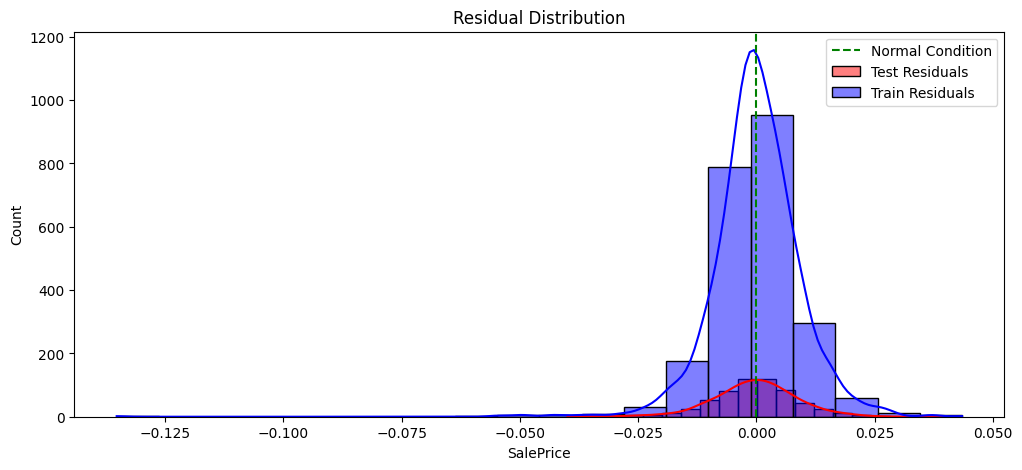

In [72]:
plt.figure(figsize=(12, 5))
sns.histplot(test_residuals, bins=20, color='red', kde=True, label='Test Residuals')
sns.histplot(train_residuals, bins=20, color='blue', kde=True, label='Train Residuals')
plt.axvline(0, color='green', linestyle='--', label='Normal Condition')
plt.legend()
plt.title('Residual Distribution')
plt.show()

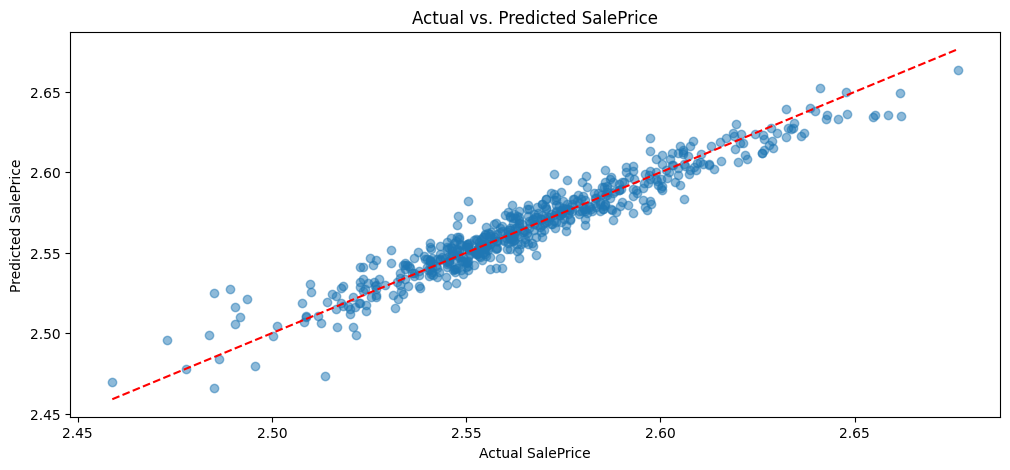

In [73]:
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.show()

## Feature Importance

In [74]:
feature_names = X_train.columns

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": np.abs(ridge.coef_)})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient
5,Overall Qual,0.004699
39,Total Bathrooms,0.002920
23,TotRms AbvGrd,0.002797
24,Fireplaces,0.002183
6,Overall Cond,0.002063
2,Lot Area,0.001928
28,Garage Area,0.001838
174,Functional_Sal,0.001793
38,Remodel Age,0.001765
27,Garage Cars,0.001655


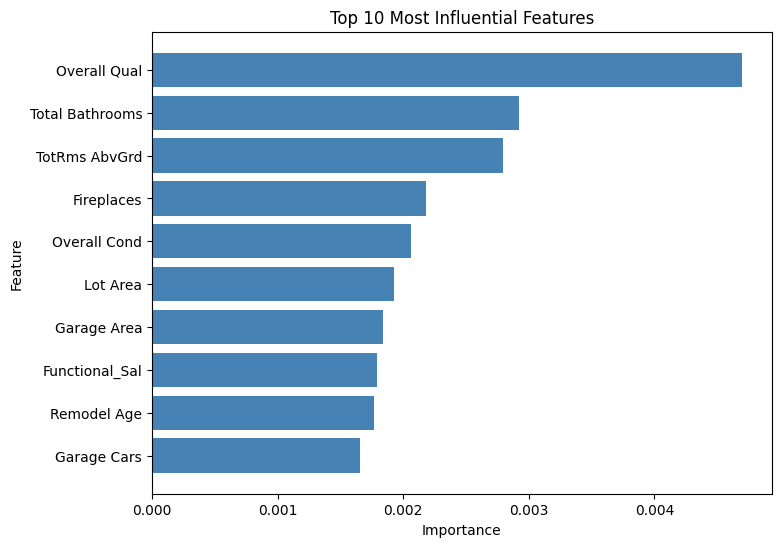

In [75]:
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)

top_10_features = coef_df.head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_10_features["Feature"], top_10_features["Coefficient"], color="steelblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Influential Features")
plt.gca().invert_yaxis() 
plt.show()

### --------------------------------Please Upvote--------------------------------